In [7]:
import os
import time
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from tqdm import tqdm
import math
from sklearn.model_selection import train_test_split
from sklearn import metrics

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation, GRU, Conv1D
from keras.layers import Bidirectional, GlobalMaxPool1D, GlobalMaxPooling1D, GlobalAveragePooling1D
from keras.layers import Input, Embedding, Dense, Conv2D, MaxPool2D, concatenate
from keras.layers import Reshape, Flatten, Concatenate, Dropout, SpatialDropout1D
from keras.layers import BatchNormalization, InputSpec, add
from keras.optimizers import Adam
from keras.models import Model, load_model
from keras import backend as K
from keras.engine.topology import Layer
from keras import initializers, regularizers, constraints, optimizers, layers, activations
from keras.callbacks import Callback, EarlyStopping, ModelCheckpoint
from keras.utils import Sequence
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

In [33]:
train = pd.read_csv('train_cust_starter.csv')
# i = 0

In [84]:
# plt.scatter(np.log(train.loc[train.stock_id==0].pred_lgb2),
#             np.log(train.loc[train.stock_id==0].target),
#            c = np.log(train.loc[train.stock_id==0][ind[i]]))
# i+=1
cor = train.corr()

In [85]:
abs(cor['diff']).sort_values(ascending = False)

diff                        1.000000
target                      0.637025
wap_balance_std_300         0.269491
wap_balance_std             0.266752
price_spread_std_300        0.266250
                              ...   
total_volume_std_480        0.002697
total_volume_std_540        0.000707
sum_size                    0.000672
median_size                 0.000412
volume_imbalance_std_540    0.000298
Name: diff, Length: 71, dtype: float64

In [124]:
# train
# ind = (abs(cor['target']).sort_values(ascending = False)>0.8).index.tolist()
# ind[i-1]
# train['diff'] = (train['pred_lgb2'] - train['target'])
i = 0.5
train['diff_2'] = (train['pred_lgb2']*(i) - train['target'] + train['log_return1']*(1-i))
# np.mean(train['diff'])
abs(train['diff_2']).max() , abs(train['diff']).max() , train['diff_2'].mean() ,train['diff'].mean()

(0.06669284053926318,
 0.06687452717852636,
 -2.320099157176529e-05,
 -0.00039914047893942114)

In [111]:
# (train.iloc[abs(train['diff']).argsort()[-10000:]].time_id).mode()


(0.06654749122785264,
 0.06687452717852636,
 0.00027755059832236203,
 -0.00039914047893942114)

In [148]:
# plt.plot(train.loc[train.stock_id == 0,'sum_size'])
# plt.plot(train.loc[train.stock_id == 0,'target']*1000000)
tes = train.groupby(['stock_id','time_id']).apply(sum)
# train.info()

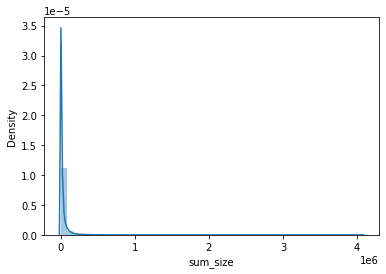

In [150]:
# (tes['sum_size']).sort_values(ascending = False)
import seaborn as sns 
sns.distplot((tes['sum_size']))